In [103]:
# генератор псевдослучайной равномернораспределенной величины
import random
def gen():
    arr = [] 
    a = 630360016
    m = 2147483647
    n = 10
    for i in range(n):
        x = random.randint(1000000000, 1500000000)
        xx = a*x % m
        y = xx/m
        arr.append(y)
    return arr

In [104]:
# генератор дискретной случайной величины по закону пуассона
import math
def poisson():
    l = 5
    a = math.exp(-l)
    b = 1
    i, count = 0, 0
    x = []
    while count<100:
        y = gen()[0]
        b = b*y
        if b<a:
            x.append(i)
            count+=1
            b = 1
            i = 0
        i += 1
    return x

In [105]:
# мат. ожидание от х
def expectedV(x):
    s = sum(x)
    return s/len(x)

In [106]:
# дисперсия от х
def disp(x):
    s, ss = 0.0, 0.0
    for k in x:
        s += (k - expectedV(x))**2
        ss = s/(len(x)-1)
    return (ss)

In [107]:
# Корреляция
def cor(x):
    n = len(x)
    max_j = 20
    k = [0] * max_j
    for j in range(1, max_j):
        k[j] = sum([(x[i] - expectedV(x)) * (x[i + j] - expectedV(x)) for i in range(n-j)]) / (n-j)
    p = [float(elem)/disp(x) for elem in k]
    return p

In [108]:
# доверительный интервал от х
import math
def conf_interval(x):
    m = [expectedV(x) - 1.96*math.sqrt(disp(x))/math.sqrt(len(x)), expectedV(x) + 1.96*math.sqrt(disp(x))/math.sqrt(len(x))]
    return m

In [109]:
# график корреляции от х
from matplotlib import pyplot as plt
def cor_chart(c, color):
    fig = plt.figure(figsize=(5,5))
    plt.scatter(list(range(1, len(c)+1)), c, color=color)
    plt.ylabel('значения корреляционной функции')
    plt.xlabel('номера значений')
    plt.title('График корреляции')

In [110]:
# набор координат для графика частоты появления сл. вел. от х
import collections
def get_bars(x):
    n = 100
    c = dict(collections.Counter(x[0:n]))
    yy = list(c.values())
    xx = list(c.keys())
    return (xx, yy)   

In [111]:
# график частоты появления случайной величины от х
def chart_bars(xx, color): #color - str type 
    n = 100
    x, y = get_bars(xx)
    fig = plt.figure(figsize=(5,5))
    plt.bar(x, y, align='center', width = 0.5, color = color)
    plt.xticks(x)
    plt.ylabel('частота появления')
    plt.xlabel('значения случайной величины')
    plt.title('График частоты появления случайной величины')

Случайная дискретная величина Xi:  [7, 4, 6, 8, 3, 8, 4, 6, 8, 5, 3, 4, 4, 5, 6, 3, 7, 10, 5] 

i =  100 

Мат.ожидание =  6.12 

Дисперсия =  4.147070707070706 

Доверительный интервал =  [5.720858586109098, 6.519141413890902] 



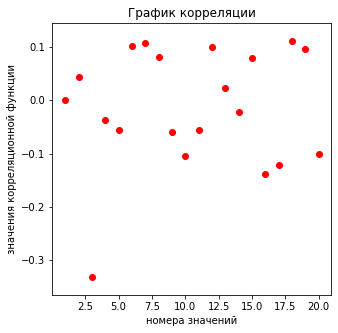

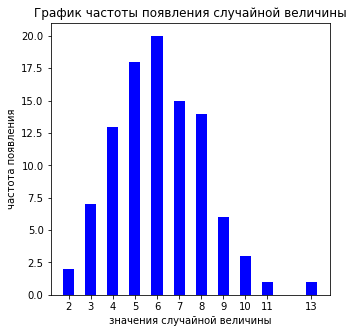

In [119]:
# моделирование случайной дискретной величины по закону Пуассона
# метод последовательного увеличения числа членов n в произведении

x3 = poisson()

mat3 = expectedV(x3)
d3 = disp(x3)
cr3 = cor(x3)
m3 = conf_interval(x3)

print('Случайная дискретная величина Xi: ', x3[0:19], '\n')
print('i = ',len(x3), '\n')
print('Мат.ожидание = ', mat3, '\n')
print('Дисперсия = ', d3, '\n')
print('Доверительный интервал = ', m3, '\n')

cor_chart(cr3[0:20], 'r')
chart_bars(x3, 'b')